# ORKG data statistics

This notebook contains some statistics about the ORKG data.

In [20]:
import os

base_dir = os.path.join('./praktikum-ise-2023-patrick-zierahn')
data_dir = os.path.join(base_dir, 'data')

reports_dir = os.path.join(base_dir, 'reports', 'okrg-data-statistics')
os.makedirs(reports_dir, exist_ok=True)

In [21]:
# Read pandas dataframe from csv file
import pandas as pd
import numpy as np

df = pd.read_csv('data/orkg_with_abstracts.csv')
df["doi"] = df.doi.apply(eval).apply(np.array)  # convert string to array
df["subfields"] = df.subfields.apply(eval).apply(np.array)  # convert string to array
df = df.fillna('')

In [22]:
df.head()

,id,title,doi,research field,subfields,abstract
0,R209491,Knowledge management framework for monitoring ...,[10.1109/EESMS.2015.7175848],Computer Engineering,"[Robotics, Digital Circuits, Data Storage Syst...",In the last decades scarcity of resources and ...
1,R585639,Contribution 1,[],Theoretical Computer Science,[],
2,R504922,A Strong Baseline for Fashion Retrieval with P...,[],Computer Sciences,"[Security and Dependability, Computer Architec...",
3,R146959,Contribution 1,[10.1109/tbme.2018.2880927],Control Theory,[],"Objective: To develop and evaluate in silico, ..."
4,R191366,Contribution 1,[10.1145/3289600.3290994],Science and Technology Studies,[],Social media is becoming popular for news cons...


In [23]:
# Count number of rows
len(df)

26745

In [24]:
# Print unique from the arrays of  subfields
field_count = {}

for subfields in df['subfields']:
    for subfield in subfields:
        if subfield in field_count:
            field_count[subfield] += 1
        else:
            field_count[subfield] = 1

print(f"Number of unique subfields: {len(field_count.keys())}")
for subfield in field_count.keys():
    print(subfield)

Number of unique subfields: 692
Robotics
Digital Circuits
Data Storage Systems
Hardware Systems
Computer and Systems Architecture
Digital Communications and Networking
Security and Dependability
Computer Architecture and Embedded Systems
Computational Complexity
Massively Parallel and Data-Intensive Systems
Databases/Information Systems
Theoretical Computer Science
Theory/Algorithms
Human Computer Interfaces
Multiagent Systems
Cryptography and Security
Information Systems, Process and Knowledge Management
Graphics
Image and Video Processing
Requirements Engineering
Computers and Society
Programming Languages/Compilers
Numerical Analysis/Scientific Computing
Computational Geometry
Neural and Evolutionary Computing
Audio and Speech Processing
Artificial Intelligence
Operating Systems
Machine Learning
Computer Science and Game Theory
Information Theory
Semantic Web
Operating, Communication, Database and Distributed Systems
OS/Networks
Logic in Computer Science
Software Engineering and Pro

In [25]:
# Print max and min value with key from dictionary
print(f"Max: {max(field_count, key=field_count.get)} {max(field_count.values())}")
print(f"Min: {min(field_count, key=field_count.get)} {min(field_count.values())}")

Max: Multiagent Systems 14469
Min: Ego-centric networks 5


In [42]:
# Calculate the average number of subfields per paper

subfields_count = {}
subfields_per_paper = []
for subfields in df['subfields']:
    count = len(subfields)
    subfields_per_paper.append(count)

    for subfield in subfields:
        if subfield in subfields_count:
            subfields_count[subfield] += 1
        else:
            subfields_count[subfield] = 1

print(f"Average number of subfields per paper: {sum(subfields_per_paper) / len(subfields_per_paper)}")

Average number of subfields per paper: 119.41028229575622


In [43]:
# Write subfields count to csv file
import csv

with open(os.path.join(reports_dir, 'subfields_count.csv'), 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['subfield', 'count'])
    for key, value in subfields_count.items():
        writer.writerow([key, value])

In [28]:
# Calculate the standard deviation of the number of subfields per paper
print(f"Standard deviation of the number of subfields per paper: {np.std(subfields_per_paper)}")

Standard deviation of the number of subfields per paper: 239.68537448634046


In [29]:
# Calculate the variance of the number of subfields per paper
print(f"Variance of the number of subfields per paper: {np.var(subfields_per_paper)}")

Variance of the number of subfields per paper: 57449.078742657264


In [30]:
# Calculate the average number of papers per subfield
papers_per_subfield = []
for subfield in field_count.keys():
    papers_per_subfield.append(field_count[subfield])

print(f"Average number of papers per subfield: {sum(papers_per_subfield) / len(papers_per_subfield)}")

Average number of papers per subfield: 4615.06936416185


In [31]:
# Count the 'research field' per class
df['research field'].value_counts()

research field
Computer Sciences                              9734
Science                                        3976
Ecology and Evolutionary Biology               1376
Bioinformatics                                 1188
Artificial Intelligence                         720
                                               ... 
Parasitology                                      1
Clinical Infectiology and Tropical Medicine       1
Structural Engineering                            1
Classics                                          1
Algebra                                           1
Name: count, Length: 307, dtype: int64

In [45]:
# Write 'research field' count to csv file
import csv

with open(os.path.join(reports_dir, 'research_field_count.csv'), 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['research field', 'count'])
    for key, value in df['research field'].value_counts().items():
        writer.writerow([key, value])

In [32]:
# Calculate the average number of 'research field' per class
research_field_per_class = []
for research_field in df['research field']:
    research_field_per_class.append(len(research_field))

print(f"Average number of 'research field' per class: {sum(research_field_per_class) / len(research_field_per_class)}")

Average number of 'research field' per class: 18.94013834361563


In [33]:
# Get df rows that have an abstract
df_with_text = df[df['abstract'] != '']

# Get df rows that have less 10 subfields and more than 0 research field
df_sub = df_with_text[(df_with_text['subfields'].apply(len) < 20) & (df_with_text['subfields'].apply(len) > 0)]

# Print random sample of 3 rows
for _, row in df_sub.sample(3, random_state=21223).iterrows():
    subfields = row['subfields']
    subfields.sort()

    print(f"Title: {row['title']}")
    print(f"Abstract: {row['abstract']}")
    print(f"Research field: {row['research field']}")
    print(f"Subfields ({len(subfields)}): {subfields}")
    print("-" * 50)

Title: research data
Abstract: The modern automobile is a complex electronic system with a number of features providing functionalities for driver and passenger convenience, control of the vehicle, and safety of the occupants. As new features are developed and introduced into the automobile, they interact with already existing features, sometimes resulting in undesirable behaviours. These undesirable interactions are often detected very late in the development cycle, or sometimes even in the field. This introduces uncertainty in the system development process as changes to address these interactions often result in a cascading series of changes whose scope is difficult to predict. This paper presents a method and algorithms for identifying and resolving feature interactions early in the development life-cycle by addressing the problem at the level of requirements specifications. We have applied this method successfully in the automotive domain and present a case study of detecting and 

In [34]:
# Count the number of papers that have less 50 subfields
len(df[df['subfields'].apply(len) < 20])

12628

In [35]:
len(df[df['subfields'].apply(len) > 80])

4251

In [36]:
# Count the number of papers that have an abstract
len(df[df['abstract'] != ''])

8077

In [37]:
len(df_sub)

1741

(array([2.2494e+04, 2.2000e+02, 4.2000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.9870e+03]),
 array([  0.,  69., 138., 207., 276., 345., 414., 483., 552., 621., 690.]),
 <BarContainer object of 10 artists>)

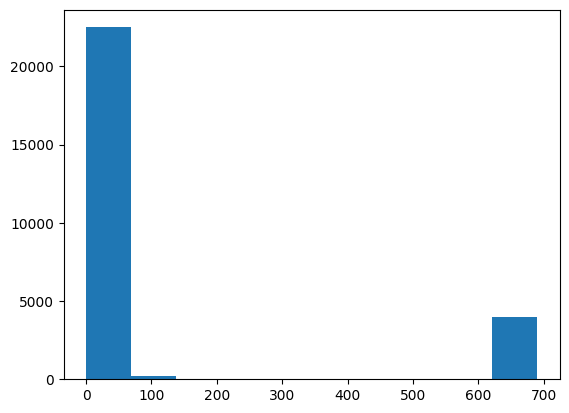

In [38]:
import matplotlib.pyplot as plt

labels_per_paper = []

for _, row in df.iterrows():
    labels_per_paper.append(len(row['subfields']))

plt.hist(labels_per_paper, bins=10)

(array([722., 102.,   4., 617.,   6., 203.,  11.,   8.,  54.,  14.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

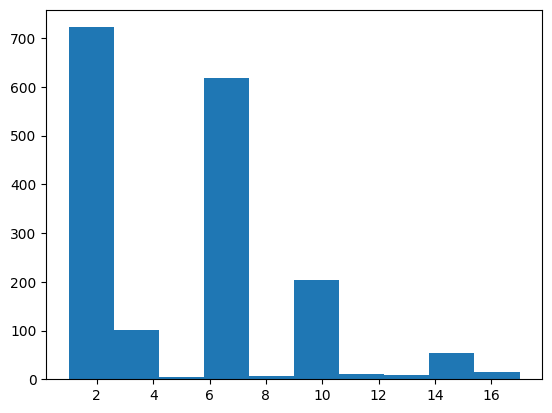

In [39]:
labels_per_paper = []

for _, row in df_sub.iterrows():
    labels_per_paper.append(len(row['subfields']))

plt.hist(labels_per_paper, bins=10)

In [40]:
# Get df rows where subfields contain 'Botany'
df_botany = df_sub[
    df_sub['subfields'].apply(lambda x: 'Botany' in x) &
    (df_sub['subfields'].apply(len) < 100)
    ]